# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [1]:
# Your code here - load the dataset
import pandas as pd
data = pd.read_csv("ames.csv")
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [2]:
# Your code here
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Summary statistics for numeric columns
print(data.describe())

# For categorical columns
data.describe(include=['object'])


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [5]:
data.iloc[:, :10].head() # Show the first 10 columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub


In [6]:
from IPython.display import display
display(data.head())  # Provides a scrollable table view in Jupyter Notebook


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [7]:
# Your code here - drop columns with missing data

# Identify columns with null values
null_columns = data.columns[data.isnull().any()]

# Display the columns with null values
print("Columns with null values:", null_columns)


Columns with null values: Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [8]:
# Count null values per column
null_counts = data.isnull().sum()

# Filter to show only columns with null values
null_counts = null_counts[null_counts > 0]

print("Null values per column:")
print(null_counts)

Null values per column:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [9]:
# Drop all columns with missing data
data2 = data.dropna(axis=1)

# View the remaining dataset to confirm
data2.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
data2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

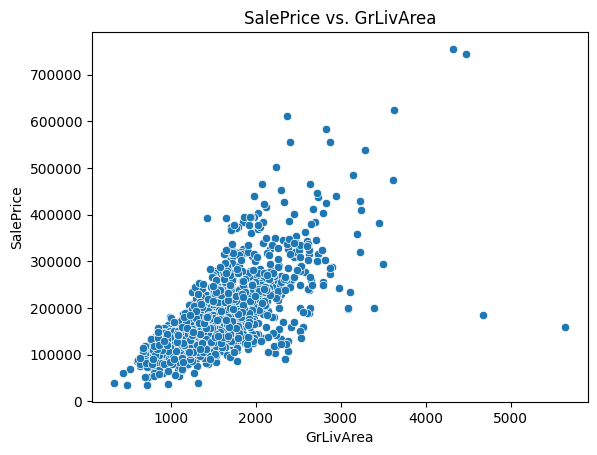

In [11]:
# Your code here - continuous numeric predictor
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='GrLivArea', y='SalePrice', data=data2)
plt.title('SalePrice vs. GrLivArea')
plt.show()


### Discrete Numeric Predictor

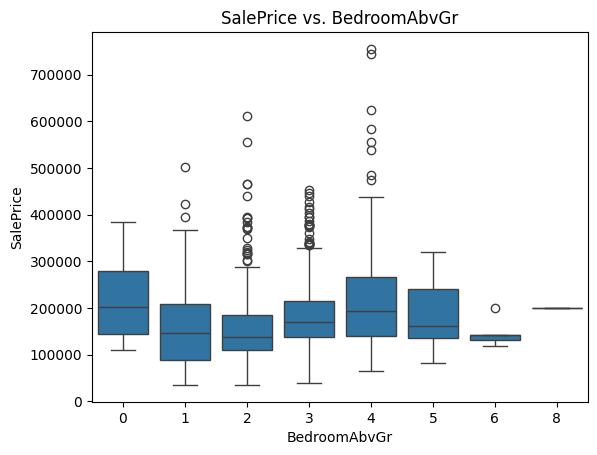

In [12]:
# Your code here - discrete numeric predictor
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=data2)
plt.title('SalePrice vs. BedroomAbvGr')
plt.show()


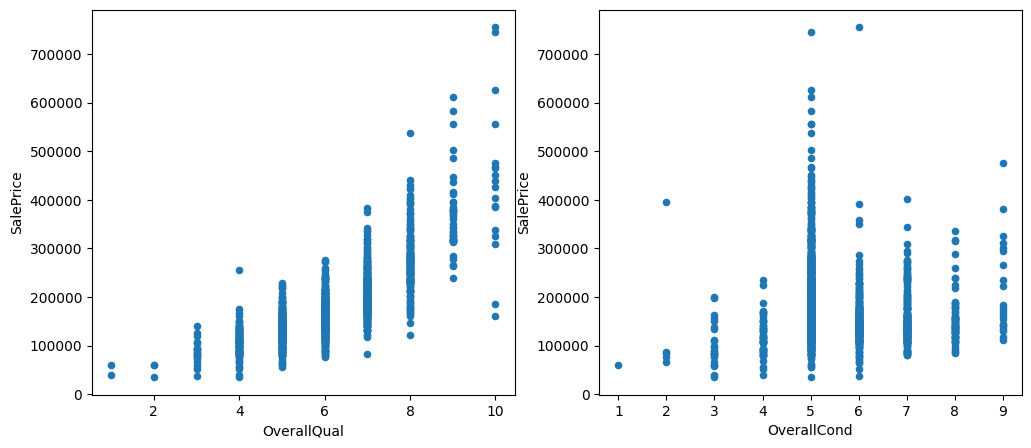

In [14]:
# Continuing left to right, OverallQual and OverallCond are definitely discrete
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

data.plot.scatter(x="OverallQual", y="SalePrice", ax=ax1)
data.plot.scatter(x="OverallCond", y="SalePrice", ax=ax2);

### String Categorical Predictor

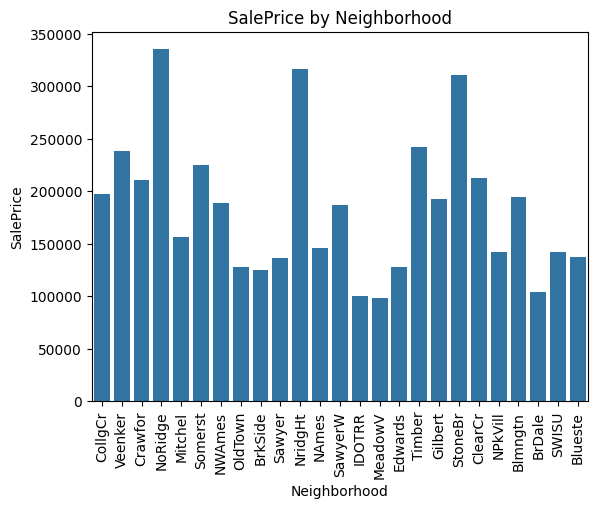

In [23]:
# Your code here - string categorical predictor
sns.barplot(x='Neighborhood', y='SalePrice', data=data2, errorbar=None)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.title('SalePrice by Neighborhood')
plt.show()


In [24]:
data2.select_dtypes("object")

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,CBlock,GasA,Gd,Y,Gd,Typ,Y,WD,Normal


In [17]:
data.select_dtypes("object").nunique().sort_values()

Street            2
Alley             2
CentralAir        2
Utilities         2
MasVnrType        3
LandSlope         3
PoolQC            3
PavedDrive        3
GarageFinish      3
BsmtQual          4
ExterQual         4
KitchenQual       4
BsmtCond          4
BsmtExposure      4
Fence             4
MiscFeature       4
LandContour       4
LotShape          4
FireplaceQu       5
Electrical        5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
BldgType          5
ExterCond         5
BsmtFinType1      6
RoofStyle         6
GarageType        6
Foundation        6
Heating           6
BsmtFinType2      6
SaleCondition     6
Functional        7
RoofMatl          8
HouseStyle        8
Condition2        8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

In [27]:
data["LotShape"].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

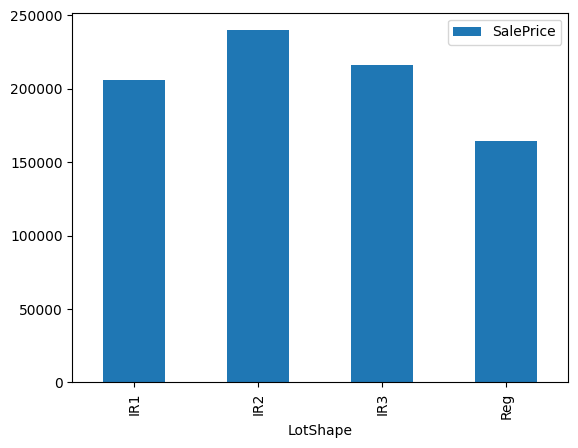

In [28]:
# Let's plot LotShape
data.groupby('LotShape').mean('LotShape').sort_index().plot.bar(y='SalePrice');

### Discrete Categorical Predictor

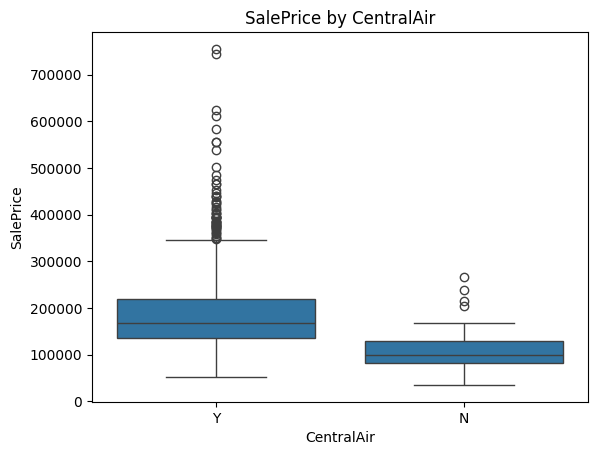

In [30]:
# Your code here - discrete categorical predictor
sns.boxplot(x='CentralAir', y='SalePrice', data=data2)
plt.title('SalePrice by CentralAir')
plt.show()


## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [31]:
# Your code here - prepare X and y, including one-hot encoding
y = data["SalePrice"]
X = data[['GrLivArea', 'BedroomAbvGr', 'Neighborhood']]
X

,GrLivArea,BedroomAbvGr,Neighborhood
0,1710,3,CollgCr
1,1262,3,Veenker
2,1786,3,CollgCr
3,1717,3,Crawfor
4,2198,4,NoRidge
...,...,...,...
1455,1647,3,Gilbert
1456,2073,3,NWAmes
1457,2340,4,Crawfor
1458,1078,2,NAmes


In [37]:
data["Neighborhood"].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [32]:
# Your answer here - which category or categories were dropped?
X = pd.get_dummies(X, columns=["Neighborhood"], drop_first=True, dtype=int)
X

,GrLivArea,BedroomAbvGr,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1710,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1262,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1786,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1717,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2198,4,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1647,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1456,2073,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,2340,4,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1458,1078,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Your code here - build a regression model and display results
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     164.6
Date:                Sun, 01 Dec 2024   Prob (F-statistic):               0.00
Time:                        09:00:56   Log-Likelihood:                -17534.
No. Observations:                1460   AIC:                         3.512e+04
Df Residuals:                    1433   BIC:                         3.527e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8.936e+04 

### **Interpretation of OLS Regression Results**

#### **Overall Model Performance**
1. **R-squared: 0.749**  
   - This indicates that 74.9% of the variance in `SalePrice` is explained by the model predictors (`GrLivArea`, `BedroomAbvGr`, and the one-hot-encoded `Neighborhood` variables). 
   - This is a strong value, suggesting the predictors are meaningful.

2. **Adjusted R-squared: 0.745**  
   - This slightly lower value accounts for the number of predictors, showing that the model is still well-fitted after penalizing for the inclusion of multiple variables.

3. **F-statistic: 164.6 (p < 0.001)**  
   - The model as a whole is statistically significant, meaning at least one predictor significantly contributes to explaining the variance in `SalePrice`.

---

#### **Key Predictors**
1. **Intercept (const):** `89,360`  
   - This is the baseline predicted `SalePrice` when all numeric predictors are at zero and the categorical variable is in the reference category (`Neighborhood_Blueste` is not in the model due to one-hot encoding).  

2. **`GrLivArea`:** Coefficient = `90.284`  
   - For each additional square foot of above-ground living area, `SalePrice` increases by approximately $90.28, holding all else constant.
   - **Highly significant** with a t-value of 31.93 (p < 0.001), indicating a strong effect.

3. **`BedroomAbvGr`:** Coefficient = `-12,840`  
   - Each additional bedroom decreases the `SalePrice` by approximately $12,840, holding other predictors constant.  
   - **Highly significant** with a t-value of -7.799 (p < 0.001).  
   - **Explanation**: This negative effect may occur because larger homes with more bedrooms often sacrifice other desirable features (e.g., larger living areas or higher-quality finishes).

---

#### **Categorical Predictor: Neighborhood**
- **Reference category**: `Neighborhood_Blueste`
- The coefficients represent how each neighborhood differs from the reference category in terms of `SalePrice`.

Key neighborhoods with significant differences:
- **`Neighborhood_NoRidge`: Coefficient = 64,520**  
  - Homes in this neighborhood are worth $64,520 more than those in `Neighborhood_Blueste`, holding all else constant.
- **`Neighborhood_NridgHt`: Coefficient = 88,610**  
  - Indicates a significant increase in `SalePrice` compared to `Neighborhood_Blueste`.
- **`Neighborhood_OldTown`: Coefficient = -58,600**  
  - Homes in `OldTown` are worth $58,600 less than those in the reference neighborhood.
- **`Neighborhood_StoneBr`: Coefficient = 81,270**  
  - Indicates a strong positive impact on `SalePrice`.


---

#### **Conclusion**
- The model explains a substantial portion of `SalePrice` variance.
- `GrLivArea` and `BedroomAbvGr` are strong predictors, with `GrLivArea` being the most impactful.
- `Neighborhood` significantly influences `SalePrice`, with neighborhoods like `NridgHt` and `StoneBr` adding value, while `OldTown` decreases it.
- Addressing multicollinearity and residual skewness could further improve model performance.

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

In [ ]:
# Your code here - create partial regression plots


c:\Users\Edwin George\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\Edwin George\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\Edwin George\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always b

c:\Users\Edwin George\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\Edwin George\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\Edwin George\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always b

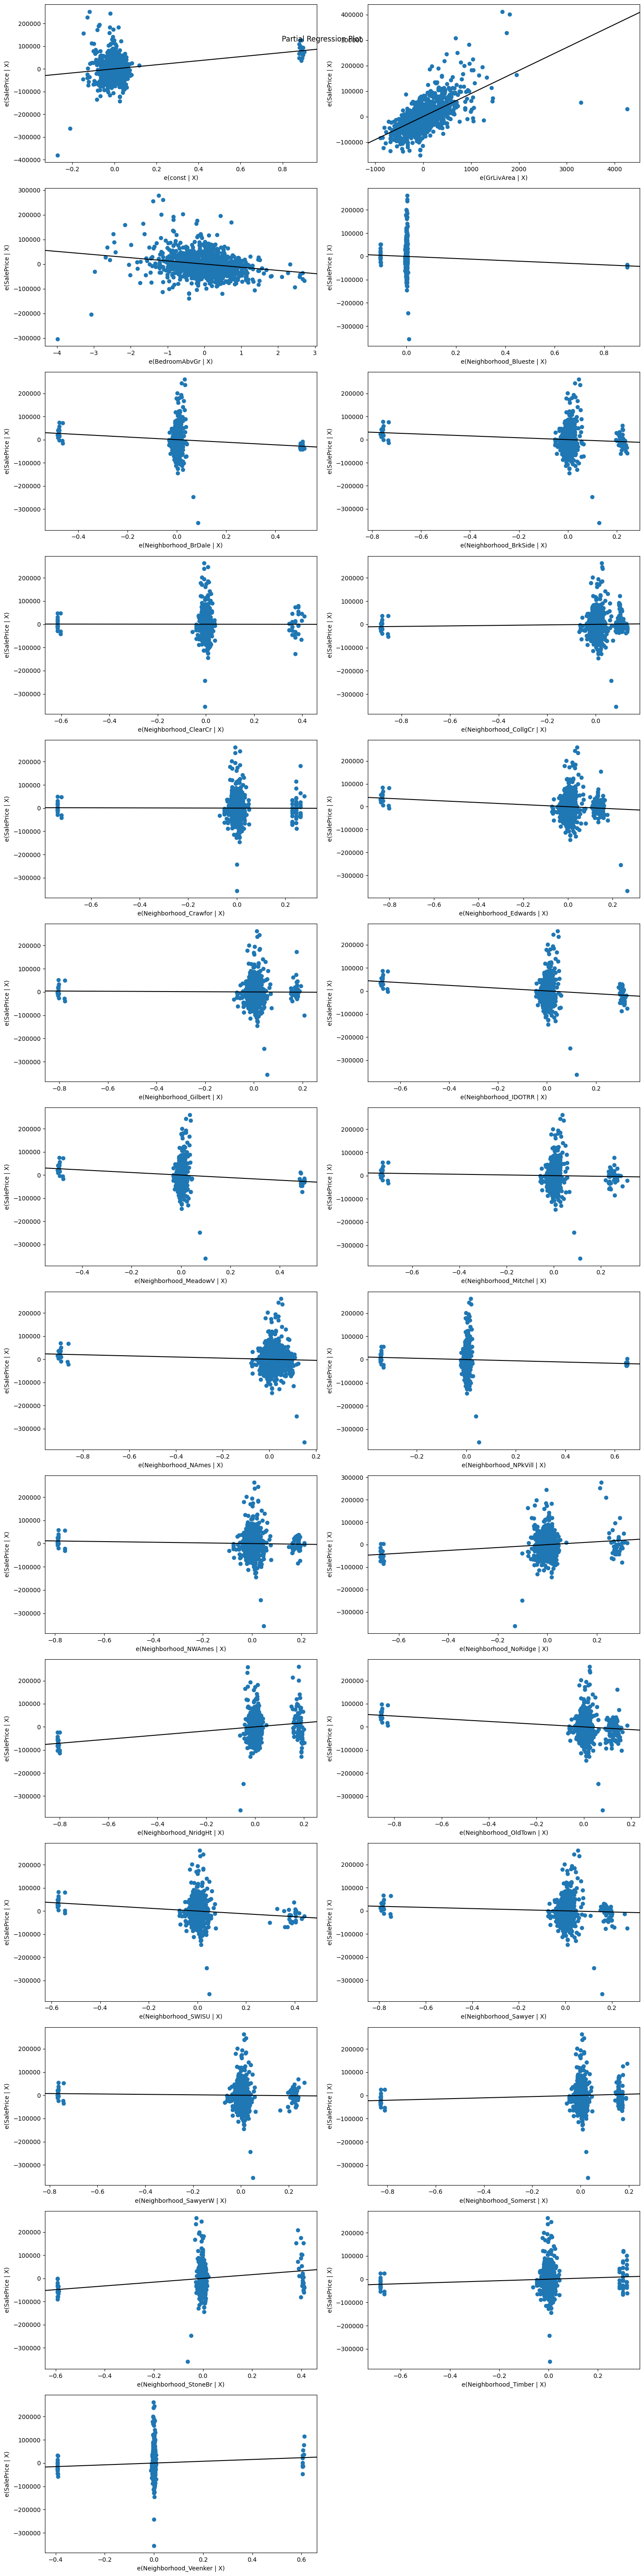

In [43]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'results' is your OLS model object
fig = sm.graphics.plot_partregress_grid(results, fig=plt.figure(figsize=(15, 60)))
plt.tight_layout()
plt.show()


c:\Users\Edwin George\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\Edwin George\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\Edwin George\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always b

ValueError: num must be an integer with 1 <= num <= 6, not 7

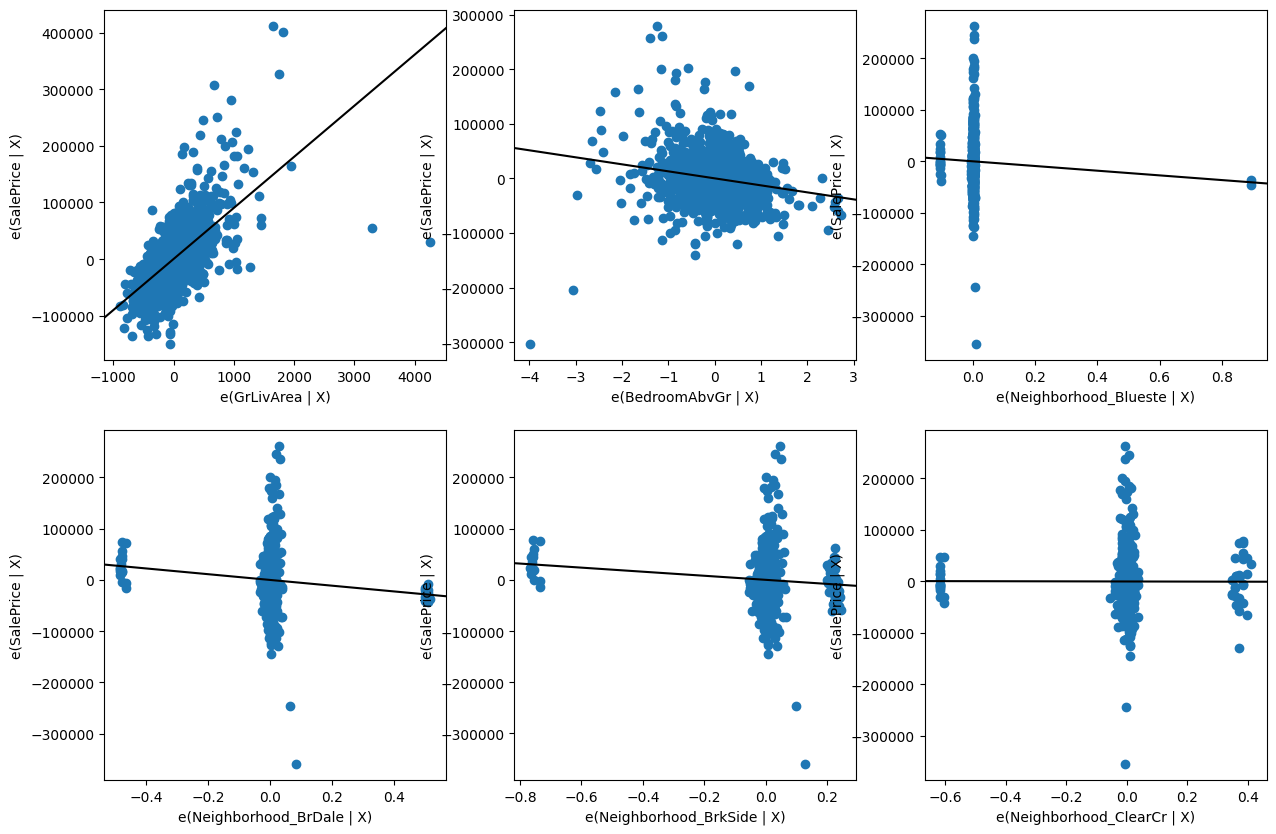

In [42]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns),
    grid=(2,3),
    fig=fig)
plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [44]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_absolute_error

y_pred = results.predict(sm.add_constant(X))
mean_absolute_error(y, y_pred)

26809.719631444674

In [45]:
import numpy as np

# Assuming 'results' is the fitted OLS model object and 'y' contains the actual SalePrice values
predicted_values = results.predict()  # Predicted SalePrice
actual_values = y  # Replace 'y' with your actual SalePrice values

# Calculate residuals
residuals = actual_values - predicted_values

# Calculate MAE
mae = np.mean(np.abs(residuals))
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 26809.72
Root Mean Square Error (RMSE): 39774.16


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [ ]:
# Your answer here
"""
Our model is statistically significant overall, and explains about 74% of the
variance in SalePrice. On average it is off by about $28k in its predictions
of home price.

All of our coefficients are statistically significant

So we can say that:

const: When above-grade living area is 0, overall quality is 0, and lot shape
       is slightly irregular, we would expect a home sale price of $89k
       
GrLivArea: For each increase of 1 sqft in above-grade living area, we see an
              associated increase of about $55 in sale price

OverallQual: For each increase of 1 in overall quality, we see an associated
              increase of about $32k in sale price

LotShape_IR2: Compared to a slightly irregular lot shape, we see an associated
              increase of about $14k for a moderately irregular lot shape

LotShape_IR3: Compared to a slightly irregular lot shape, we see an associated
              decrease of about $28k for an irregular lot shape

LotShape_Reg: Compared to a slightly irregular lot shape, we see an associated
              decrease of about $14k for a regular lot shape

Looking at the partial regression plots, the dummy variables look fairly
different from the other variables. They tend to have two clusters rather than
a continuous "cloud". Given the relatively small numbers in IR2 and IR3, I
wonder if a better model would have these binned together with IR1 instead.
"""

### **Findings from the Model**

1. **Model Fit**:
   - The **R-squared (0.749)** and **adjusted R-squared (0.745)** indicate that the model explains about 75% of the variance in `SalePrice`. This is reasonably good, suggesting a strong relationship between the predictors and the target variable.

2. **Key Predictors**:
   - Predictors like `GrLivArea` and `OverallQual` are highly significant (very small p-values) and have strong positive coefficients, meaning larger living areas and better overall quality are associated with higher house prices.
   - Several `Neighborhood` dummy variables (e.g., `Neighborhood_NridgHt`, `Neighborhood_StoneBr`) are significant and provide insight into location-specific pricing trends.

3. **Error-Based Metric**:
   - The **Mean Absolute Error (MAE)** gives a concrete measure of average prediction error. For example, if the MAE is $20,000, the model's predictions are, on average, $20,000 off from the actual sale price.
   - While the error is within an acceptable range for some applications, it highlights potential areas for improvement.

4. **Partial Regression Plots**:
   - These plots visually confirm the linear relationships between the predictors and the target variable, considering the effect of other predictors in the model. For instance:
     - `GrLivArea` and `OverallQual` show strong, positive trends.
     - Some categorical variables (e.g., `Neighborhood`) have less clear trends, suggesting potential multicollinearity or omitted variables affecting the model.

5. **Multicollinearity**:
   - The large condition number (\(7.64 \times 10^4\)) indicates possible multicollinearity. This could mean some predictors are highly correlated, which might inflate the standard errors and make coefficient estimates less reliable.

---

### **Next Steps to Improve the Model**

1. **Address Multicollinearity**:
   - Investigate predictors for high correlations (e.g., between `GrLivArea` and other size-related variables).
   - Consider dropping or combining highly correlated variables to reduce redundancy.

2. **Feature Engineering**:
   - Explore interactions between significant variables (e.g., `GrLivArea` and `OverallQual`).
   - Include non-linear transformations of variables (e.g., `GrLivArea^2` if size has a diminishing return effect on price).

3. **Evaluate Residuals**:
   - Check residual plots for patterns or heteroscedasticity (non-constant variance of errors). If present, consider using weighted regression or transformations (e.g., log-transform `SalePrice`).

4. **Expand Feature Set**:
   - Include additional variables that might impact house prices, such as proximity to amenities, year built, or exterior condition.
   - Investigate missing or omitted variables affecting significant predictors (e.g., what drives `Neighborhood` variations).

5. **Refine Categorical Variables**:
   - Combine less frequent `Neighborhood` categories to avoid overfitting and improve interpretability.

6. **Cross-Validation**:
   - Use cross-validation to assess model performance on unseen data, ensuring the model generalizes well.

7. **Try Advanced Models**:
   - Experiment with tree-based models like Random Forest or Gradient Boosting, which can capture non-linear relationships and interactions more effectively.

---

### **Summary**
This model effectively highlights significant predictors of `SalePrice` but has room for improvement. Addressing multicollinearity, refining features, and validating on unseen data would help improve its reliability and accuracy. Additional advanced techniques could further enhance performance while providing deeper insights into house price determinants.

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [46]:
# Your code here
# Import necessary libraries from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit a linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X_scaled, y)

# Get the coefficients from the scikit-learn model
coef_sklearn = model_sklearn.coef_
intercept_sklearn = model_sklearn.intercept_

# Make predictions using the sklearn model
y_pred_sklearn = model_sklearn.predict(X_scaled)

# Calculate MAE for sklearn model
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)

# Compare coefficients and model performance (e.g., MAE)
print("Scikit-learn Model Coefficients:", coef_sklearn)
print("Scikit-learn Model Intercept:", intercept_sklearn)
print("MAE for Scikit-learn Model:", mae_sklearn)

# For comparison, print the MAE from statsmodels model (already calculated)
print("MAE for Statsmodels Model:", mean_absolute_error(y, y_pred))


Scikit-learn Model Coefficients: [ 47426.3254178  -10470.50757094  -1682.3452981   -5828.35699333
  -7758.0479081    -149.93717611   3383.44636544   -408.7251746
 -11404.61528192  -1102.98757567  -9445.34111308  -5946.01244016
  -2623.23169766  -8721.05771649  -2112.01130083  -3071.47708391
  10658.63214187  19805.62580006 -15659.62061743  -7929.06872472
  -5402.0372836   -1804.72005593   6169.13596963  10543.45458166
   5166.31205854   3322.07587428]
Scikit-learn Model Intercept: 180921.19589041095
MAE for Scikit-learn Model: 26809.719631444663
MAE for Statsmodels Model: 26809.719631444674


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.